In [1]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import numpy as np
import timeit
import itertools
import importlib
import os
import glob
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import xarray as xr
import re

In [2]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
OcTPlus = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst']
CPLs_test = ['CPL_EXP10_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']
CPLs_test = ['CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']
ALL_EXP = ['CPL_EXP10_rst','CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP13_rst','CPL_EXP20_rst','CPL_EXP21_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']
Dataset = 'Ocean1'
Oc_mod_type = 'COM_NEMO-CNRS'
Bet_path = '/bettik/bouissob/'
D_path = os.path.join(Bet_path, 'Method_Data/COM_NEMO-CNRS/Method_4', 'Ocean4.csv')

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1650014524_Ex_']
['CPL_EXP10_rst'] : [2.98531428] Gt/yr 96_Ch_0-1650014524_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1650014524_Ex_']
['CPL_EXP11_rst'] : [10.10988488] Gt/yr 6_Ch_0-1650014524_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1650014524_Ex_']
['CPL_EXP12_rst'] : [5.32503111] Gt/yr 96_Ch_0-1650014524_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1650014524_Ex_']
['CPL_EXP13_rst'] : [1.88337536] Gt/yr 96_Ch_0-1650014524_Ex_     

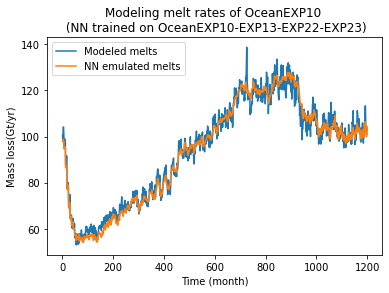

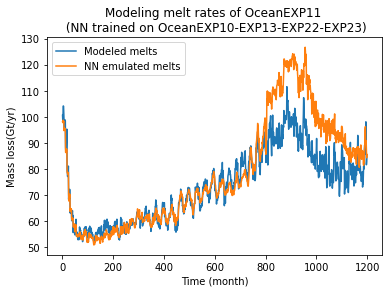

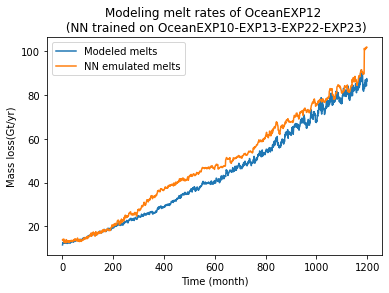

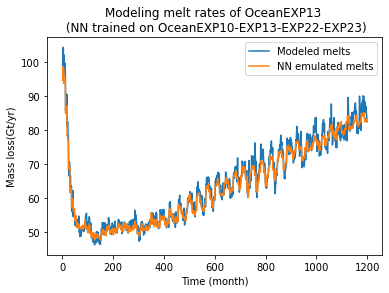

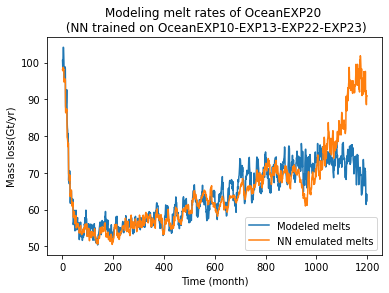

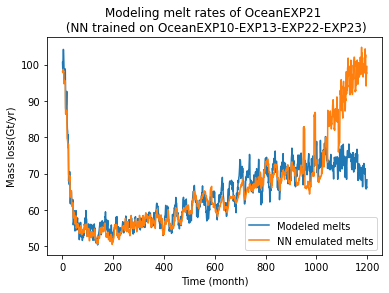

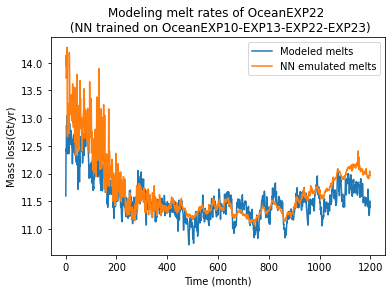

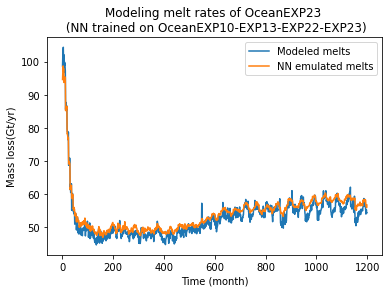

In [20]:
for exp in ALL_EXP:
    Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 0, Ocean_target = exp,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Epoch' : 80, 'Ocean' : CPLs_test, 'Method_data' : 3})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_128_128_128_128_128_Ch_0-1649850635_Ex_']
['Ocean4'] : [0.04101394] Gt/yr 28_128_128_128_Ch_0-1649850635_Ex_                                                   



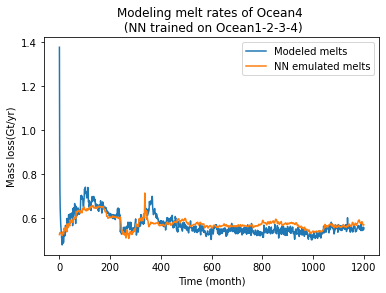

In [3]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 0, Ocean_target = 'Ocean4',
    Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Epoch' : 80 , 'Ocean' : OcT, 'Neur' : '128_128_128_128_128'})


In [17]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_96_96_96_96_96_Ch_0-1649879982_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_96_96_96_96_96_Ch_0-1649879982_Ex_


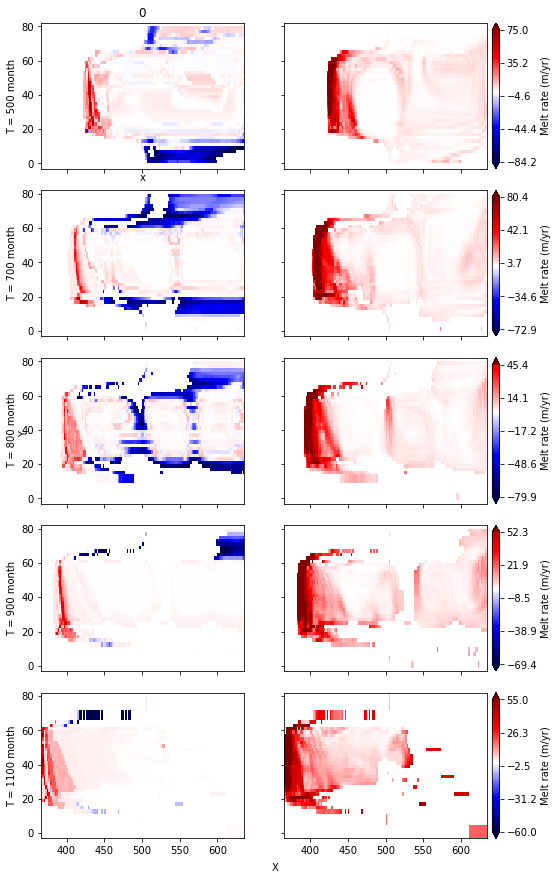

In [31]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Attribs = [{'Epoch' : 50, 'Ocean' : OcT, 'Exact' : True}], ind = 0, T = [500, 700, 800, 900, 1100], 
    Oc_tar = 'CPL_EXP10_rst', Type_tar = 'COM_NEMO-CNRS', Title = ['0'], save = False, sharing = True)

In [14]:
min(d['val_mse'])

0.0043874746188521385

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_128_128_128_128_128_Ch_0-1649850635_Ex_']


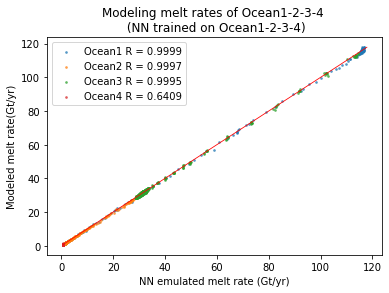

0.29466695740339544


In [17]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, index = 1, 
        NN_attributes = {'Epoch' : 80 , 'Ocean' : OcT, 'Neur' : '128_128_128_128_128'})

Ep_80_N_96_96_96_96_96_Ch_0-1649803015_Ex_


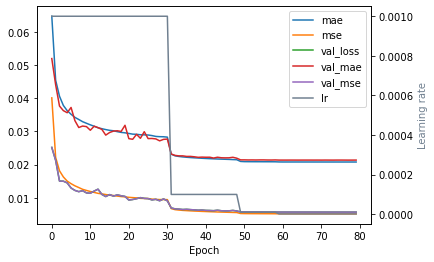

In [3]:
d = Plotting.Plot_loss_model(save = True, ind = 2, Epoch = 80, Ocean = OcT, Neur = '96_96_96_96_96', 
                    Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, 
                    Var = Var_X_BIG_Extra) 

In [5]:
min(d['val_mse'])

0.00568192545324564

Ep_80_N_96_96_96_96_96_Ch_0-1649836902_Ex_


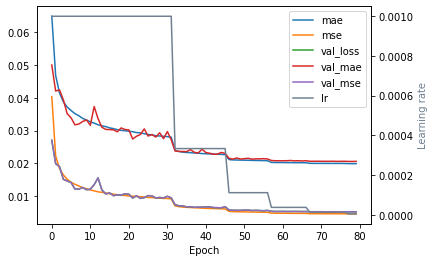

In [8]:
d2 = Plotting.Plot_loss_model(save = True, ind = 3, Epoch = 80, Ocean = OcT, Neur = '96_96_96_96_96', 
                    Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, 
                    Var = Var_X_BIG_Extra) 

In [9]:
min(d2['val_mse'])

0.005263857543468475

In [5]:
#%load_ext tensorboard

In [6]:
#tensorboard --logdir logs/fit

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1649755450_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[40.70665005]


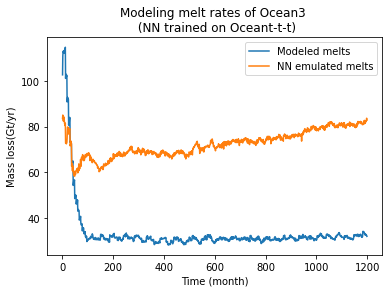

In [11]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'Ocean3',
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Var' : Var_X_BIG_Extra, 
                'Ocean' : CPLs_test})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_80_N_96_96_96_96_96_Ch_0-1649755450_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[6.67951596]


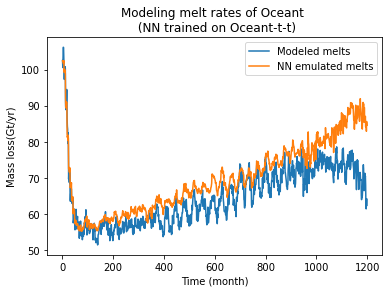

In [7]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP20_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Var' : Var_X_BIG_Extra, 
                'Ocean' : CPLs_test})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648211452_Ex_ALL_T_S_initial']
Data variables used : iceDraft T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[56.64899343]


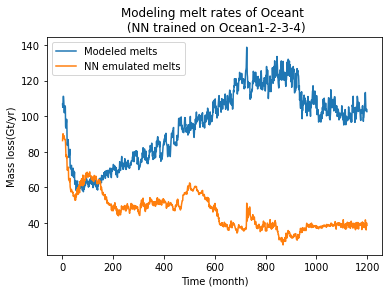

In [25]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP10_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Var' : Var_X_BIG_test, 
                'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[3.16778212]


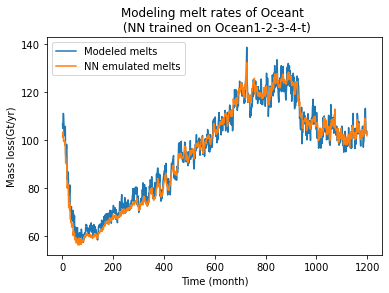

In [5]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP10_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[16.83034177]


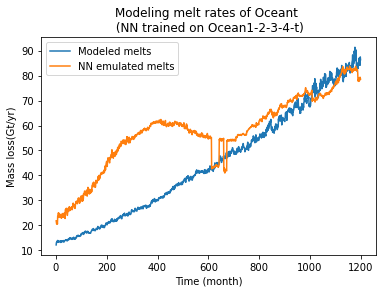

In [9]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP12_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[0.06957604]


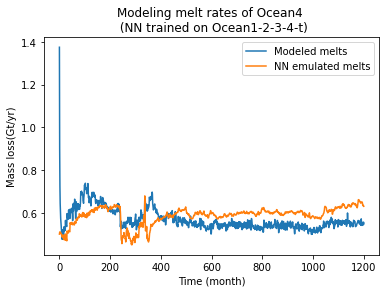

In [7]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'Ocean4',
                NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[3.16778212]


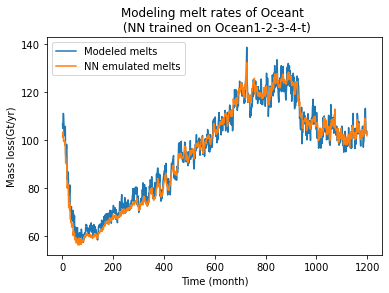

In [9]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP10_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[17.44746399]


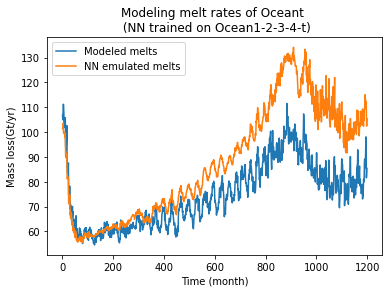

In [10]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP11_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[16.83034177]


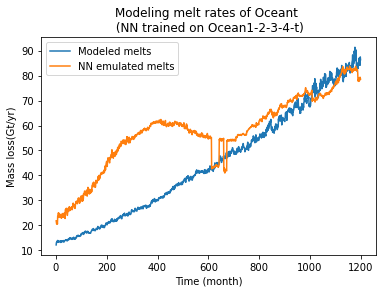

In [11]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP12_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[32.77108483]


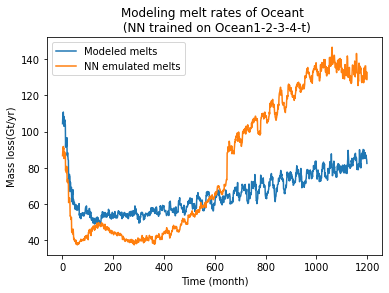

In [12]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP13_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[4.90016108]


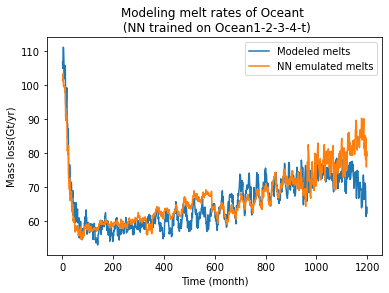

In [13]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP20_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[4.9286534]


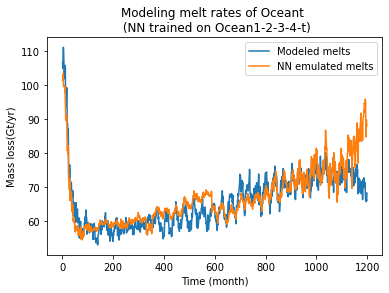

In [14]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP21_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[12.67100998]


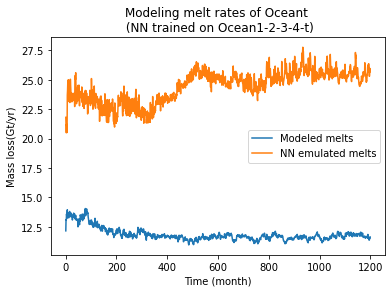

In [15]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP22_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[11.47685459]


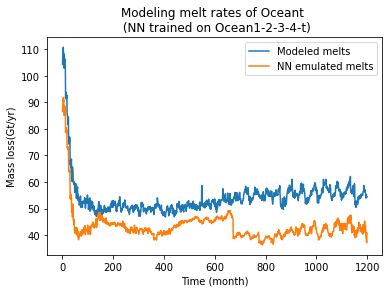

In [16]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'CPL_EXP23_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 30, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649256875_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[3.21551254]


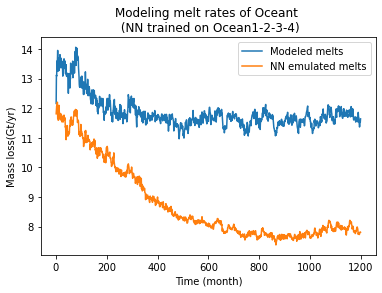

In [8]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP22_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649256875_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[41.93225237]


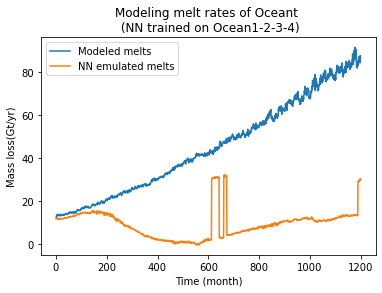

In [44]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP12_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649256875_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[44.55228511]


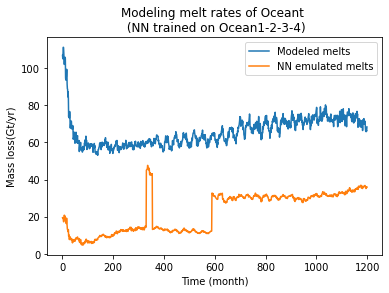

In [45]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP21_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649256875_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[39.97941265]


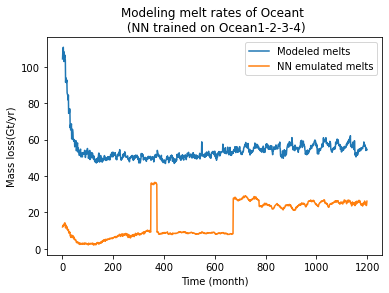

In [46]:
Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'CPL_EXP23_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649519204_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[18.60458784]


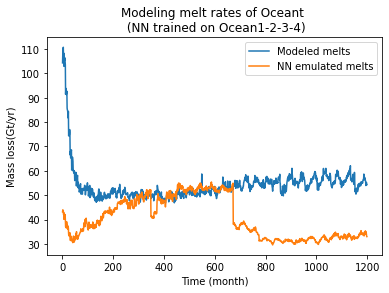

In [47]:
Plotting.Plot_Melt_time_function(ind = 4,save = False, message = 1, Ocean_target = 'CPL_EXP23_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649519204_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[17.35214045]


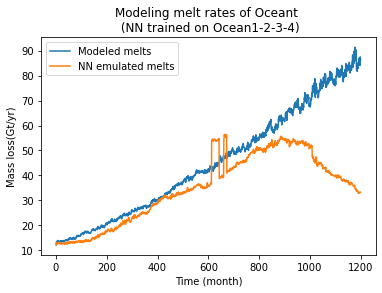

In [48]:
Plotting.Plot_Melt_time_function(ind = 4,save = False, message = 1, Ocean_target = 'CPL_EXP12_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649519204_Ex_Same_ind']
Data variables used : iceDraft bathymetry Distances_ground_line Distances_front_line Slope_iceDraft_x Slope_iceDraft_y Slope_bathymetry_x Slope_bathymetry_y T_0 T_1 T_2 T_3 T_4 T_5 T_6 T_7 T_8 T_9 T_10 T_11 T_12 T_13 T_14 T_15 T_16 T_17 T_18 T_19 T_20 T_21 T_22 T_23 T_24 T_25 T_26 T_27 T_28 T_29 T_30 T_31 T_32 T_33 T_34 T_35 T_36 T_37 T_38 T_39 S_0 S_1 S_2 S_3 S_4 S_5 S_6 S_7 S_8 S_9 S_10 S_11 S_12 S_13 S_14 S_15 S_16 S_17 S_18 S_19 S_20 S_21 S_22 S_23 S_24 S_25 S_26 S_27 S_28 S_29 S_30 S_31 S_32 S_33 S_34 S_35 S_36 S_37 S_38 S_39
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[46.00581227]


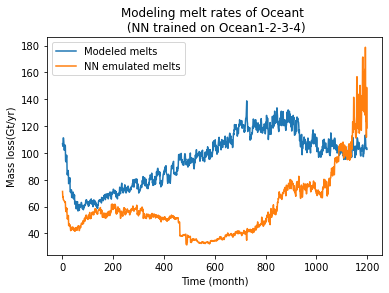

In [49]:
Plotting.Plot_Melt_time_function(ind = 4,save = False, message = 1, Ocean_target = 'CPL_EXP10_rst',
                Type_tar = 'FAVIER_2019', NN_attributes = {'Epoch' : 45, 'Var' : Var_X_BIG_Extra, 
                'Neur' : '96_96_96_96_96', 'Ocean' : OcT})

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']


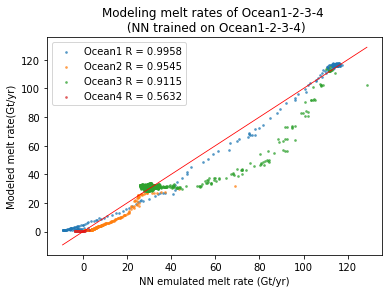

5.176324157677434


In [4]:
#Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'Ocean3', 
#                NN_attributes = {'Epoch' : 6, 'Extra_n' : 'Same_ind', 'Neur' : '32_64_64_32' , 
#                'Ocean' : OcT})
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = True, 
            message = 0, Ocean_target = OcT, index = 0, NN_attributes = {'Epoch' : 8, 
                            'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Neur' : '0'})

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind']


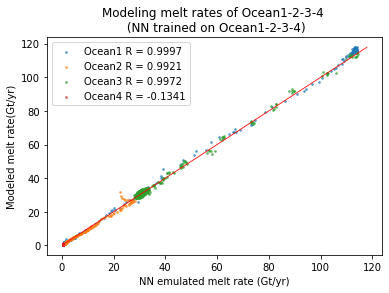

0.930941703130092


In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
            message = 0, Ocean_target = OcT, index = 1, NN_attributes = {'Epoch' : 8, 
            'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Neur' : '32_32_96_96', 'Method_data' : 4})

In [2]:
-8 % 8

0

Ep_45_N_96_96_96_96_96_Ch_0-1649436725_Ex_Same_ind


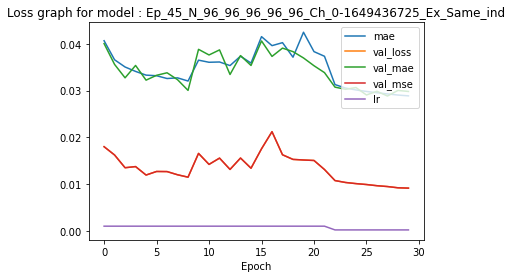

{'loss': [0.018892310559749603,
  0.01583717204630375,
  0.014552118256688118,
  0.01376352645456791,
  0.013145213015377522,
  0.012847977690398693,
  0.012555046007037163,
  0.012264369055628777,
  0.01192721538245678,
  0.016034385189414024,
  0.014651008881628513,
  0.014811775647103786,
  0.013982797041535378,
  0.016322840005159378,
  0.014500696212053299,
  0.02138005755841732,
  0.01652522012591362,
  4.218611240386963,
  0.014539025723934174,
  0.022311517968773842,
  0.01521099079400301,
  0.013872990384697914,
  0.010752509348094463,
  0.010239084251224995,
  0.00992836244404316,
  0.009711393155157566,
  0.009488812647759914,
  0.009311268106102943,
  0.009164734743535519,
  0.009034453891217709],
 'mae': [0.04065060243010521,
  0.03657687082886696,
  0.03503602743148804,
  0.0340905524790287,
  0.03329762443900108,
  0.03316676616668701,
  0.03257152438163757,
  0.03271360322833061,
  0.03203393891453743,
  0.036498695611953735,
  0.03604413568973541,
  0.03610586374998092

In [10]:
Plotting.Plot_loss_model(save = False, ind = 2, Epoch = 45, Ocean = OcT, Neur = '96_96_96_96_96', 
                         Drop = '', Extra_n = 'Same_ind', Forbid_key = ['loss', 'mse']) 

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind']


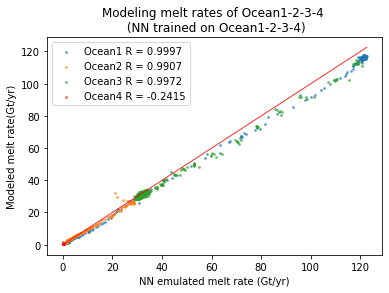

1.671492786713764


In [3]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = 'No_scaling_method4', message = 0, Ocean_target = OcT, index = 1, 
        NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : True, 
        'Scaling_lr' : False})

def Hyp_param_list(Ind, Max):
    List =['1', '4', '8','16', '32', '64', '96', '128']
    string = []
    Possible = List[min(6, 3 * Ind + int(Max)) :min(int(Max/ 1.5) + 3 + 2 * Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]
li = []
for i in range(3):
    li.extend(Hyp_param_list(0, i))
li

In [94]:
def Verify_string_tuple(Seqs, extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128']
    seqsT = list(Seqs)
    Min = int(Seqs[0][0])
    for ind, seq in enumerate(Seqs):
        removed = 0
        int_list = [int(i) for i in seq]
        Max = int_list[0]
        for ints in int_list:
            if ints<Max:
                seqsT.remove(seq)
                removed = 1
                break
            else:
                Max = ints
        if extent >= 3 and removed == 0:
            if int_list.count(Min) < int(extent)/2 and int_list.count(Min)!=0:
                seqsT.remove(seq)
    return seqsT
            
def Hyp2(Extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128'] 
    li = List[min(Extent-1 + int(Extent/2), min(len(List)-2, len(List) - 4 + int(Extent/5))):Extent + 3 + int(2/Extent) + int(Extent/5)]
    permut = list(itertools.product(li, repeat = Extent))
    Seq = Verify_string_tuple(permut, Extent)
    return ['_'.join(i) for i in Seq]

Ep_80_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind


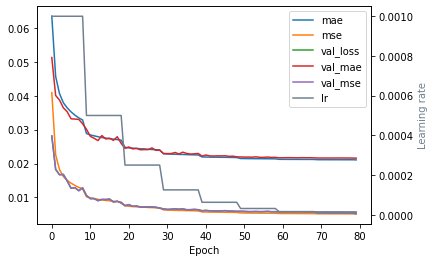

In [30]:
Data = Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 80, Ocean = OcT, Neur = '96_96_96_96_96', 
                         Second_axis = ['lr'], Extra_n = 'Same_ind', Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra) 

Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


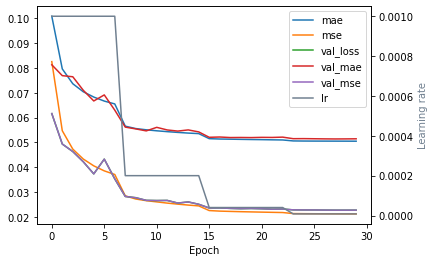

In [28]:
Data = Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 30, Ocean = OcTPlus, Neur = '96_96_96_96_96', 
                         Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra) 

In [29]:
min(Data['val_mse'])

0.022816404700279236

In [31]:
Data['val_mse'][29]

0.0066218446008861065

Ep_30_N_96_96_96_96_96_Ch_0-1649772075_Ex_


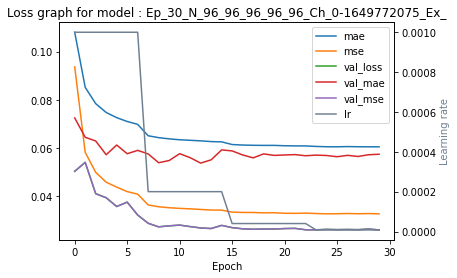

In [49]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
d = Plotting.Plot_loss_model(save = False, ind = 7, Epoch = 30, Ocean = OcT, Neur = '96_96_96_96_96', 
                         Forbid_key = ['loss'], Second_axis = ['lr'], Exact = True) 

Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind


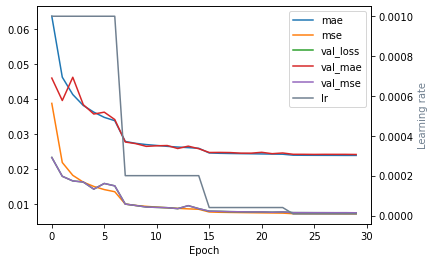

In [6]:
Data = Plotting.Plot_loss_model(save = True, ind = 1, Epoch = 30, Ocean = OcT, Neur = '96_96_96_96_96', Hybrid = False,
                         Second_axis = ['lr'], Extra_n = 'Same_ind', Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra) 

In [11]:
min(Data['lr'])

NameError: name 'Data' is not defined

Ep_45_N_96_96_96_96_96_Ch_0-1649519204_Ex_Same_ind


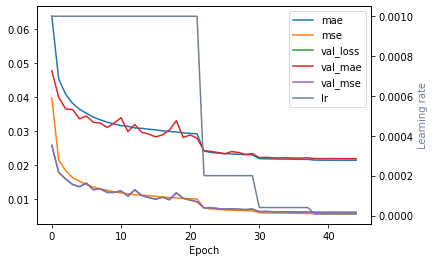

In [21]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Data = Plotting.Plot_loss_model(save = False, ind = 2, Epoch = 45, Ocean = OcT, Neur = '96_96_96_96_96', 
                        Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra)

Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind


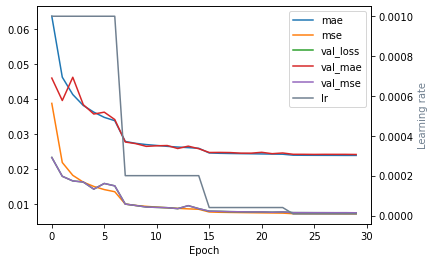

In [25]:
Data2 = Plotting.Plot_loss_model(save = False, ind = 2, Epoch = 30, Ocean = OcT, Neur = '96_96_96_96_96', 
        Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra, Hybrid = False)

In [27]:
print(min(Data['val_mse']))
print(min(Data2['val_mse']))

0.0061595020815730095
0.007502823136746883


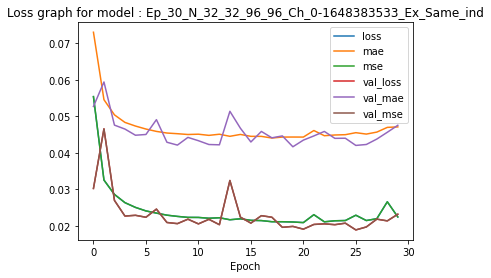

In [31]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 30, Ocean = OcT, Neur = '32_32_96_96')

Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


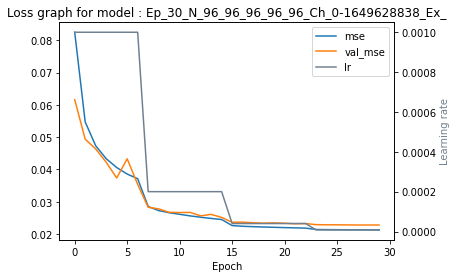

In [11]:
data = Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 30, Ocean = OcTPlus, 
                    Neur = '96_96_96_96_96',Second_axis = ['lr'], Forbid_key = ['loss', 'mae', 'val_mae', 'val_loss']) 

In [8]:
print(min(data['val_mse']))


0.022816404700279236


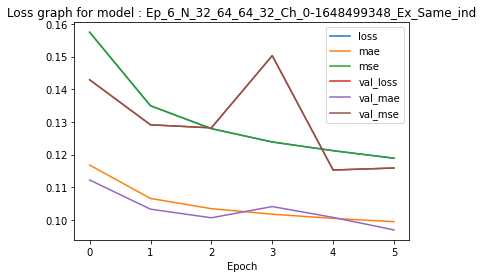

In [12]:
Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 6, Ocean = OcT, 
                    Neur = '32_64_64_32', Method_data = 3) 

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, message = 0, 
    Ocean_target = OcT, NN_attributes = {'Epoch':8, 'Neur' : '64_64_64_96_96', 'Extra_n' : 'Same_ind', 'Ocean':OcT},index = 0, Compute_at_ind = True)

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind


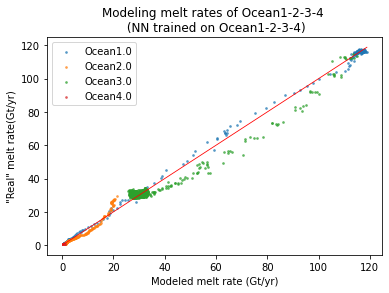

In [11]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = False, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                                                        'Extra_n' : 'Same_ind'}, Compute_at_ind = False)

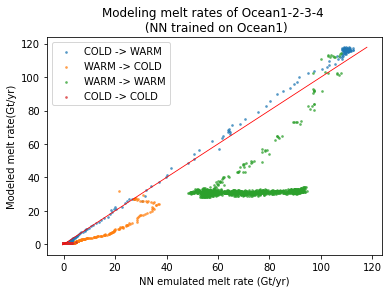

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526567.png


In [45]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

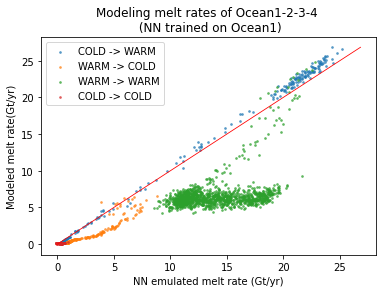

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526618.png


In [46]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

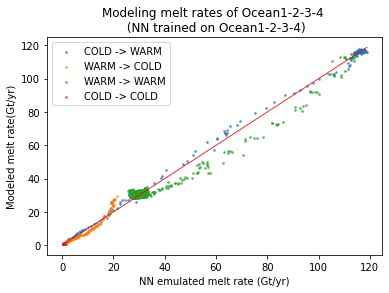

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526690.png


In [47]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

In [38]:
Dict = {'Ocean1' : 'COLD -> WARM', 'Ocean2' : 'WARM -> COLD', 'Ocean3' : 'WARM -> WARM', 'Ocean4' : 'COLD -> COLD'}

In [43]:
Dict['Ocean1']

'COLD -> WARM'

In [5]:
Trainings.Get_model_path_json(Epoch = 8, Method_data = 4, Ocean = OcT)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind']

In [6]:
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind'
df = pd.read_pickle(f"{p}/MeanX.pkl")